## Housing Prices in US

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house = pd.read_csv('train.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(house.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
house['Neighborhood'].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

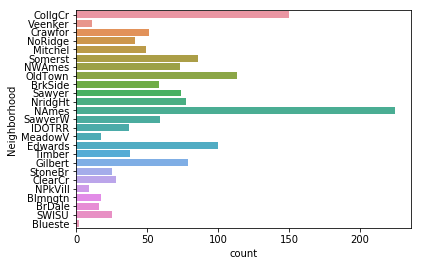

In [8]:
sns.countplot(y='Neighborhood', data=house)

### To find out Neighborhood and SalePrice relationship
##### Sort by Neighborhood -> Mean SalePrice of homes -> Graph

In [9]:
Neighbor = DataFrame(data=house['Neighborhood'])

In [10]:
Neighbor['SalePrice'] = house['SalePrice']

In [11]:
Neighbor.head()

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
4,NoRidge,250000


In [12]:
# Add all the sale price according to the neighborhood
Neighbor = Neighbor.groupby('Neighborhood').mean().reset_index()

In [13]:
Neighbor.head()

,Neighborhood,SalePrice
0,Blmngtn,194870.882353
1,Blueste,137500.000000
2,BrDale,104493.750000
3,BrkSide,124834.051724
4,ClearCr,212565.428571


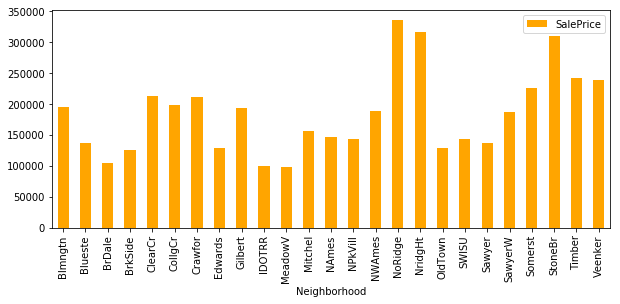

In [14]:
Neighbor.plot.bar(x='Neighborhood', y='SalePrice', color='orange', figsize=(10,4))

### To find out House style and Sale Price
##### Sort by house style and find a mean price of each house.

In [15]:
Style = DataFrame(data=house['HouseStyle'])

In [16]:
Style.head()

,HouseStyle
0,2Story
1,1Story
2,2Story
3,2Story
4,2Story


In [17]:
Style['SalePrice'] = house['SalePrice']

In [18]:
Style.head()

,HouseStyle,SalePrice
0,2Story,208500
1,1Story,181500
2,2Story,223500
3,2Story,140000
4,2Story,250000


In [19]:
Style.head()

,HouseStyle,SalePrice
0,2Story,208500
1,1Story,181500
2,2Story,223500
3,2Story,140000
4,2Story,250000


### To find out if house is more expensive witlh pool or not.
##### Price of house with a pool vs house without a pool 

In [20]:
Pool = DataFrame(data=house['PoolArea'])

In [21]:
Pool.head()

,PoolArea
0,0
1,0
2,0
3,0
4,0


In [22]:
Pool['SalePrice'] = house['SalePrice']

In [23]:
Pool.head()

,PoolArea,SalePrice
0,0,208500
1,0,181500
2,0,223500
3,0,140000
4,0,250000


In [24]:
Pool = Pool.groupby('PoolArea').mean().reset_index()

In [25]:
Pool

,PoolArea,SalePrice
0,0,180404.663455
1,480,160000.000000
2,512,235000.000000
3,519,250000.000000
4,555,745000.000000
5,576,171000.000000
6,648,181000.000000
7,738,274970.000000


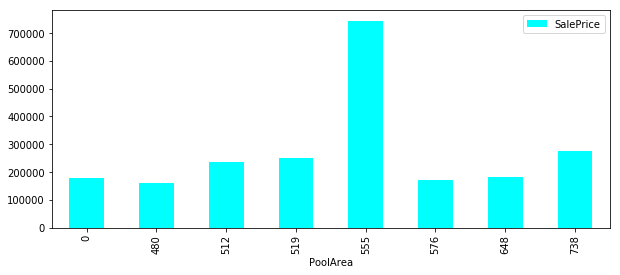

In [26]:
Pool.plot(x='PoolArea', y='SalePrice', kind='bar', color='aqua', figsize=(10,4))

## Going to analyze with Scikit Learn

In [27]:
import sklearn

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

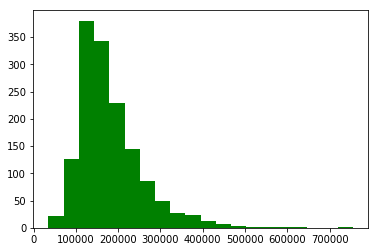

In [28]:
plt.hist(house['SalePrice'], bins=20, color='green')

In [29]:
target = DataFrame(data=house['SalePrice'])
target.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [30]:
rooms = DataFrame(data=house['BedroomAbvGr'])

In [31]:
rooms.head()

,BedroomAbvGr
0,3
1,3
2,3
3,3
4,4


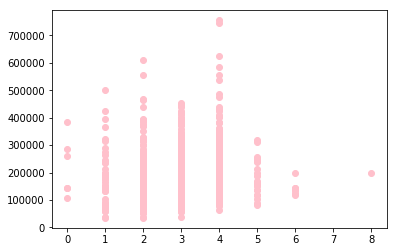

In [32]:
# Plot the column at the 5 index
plt.scatter(rooms, target, color='pink')

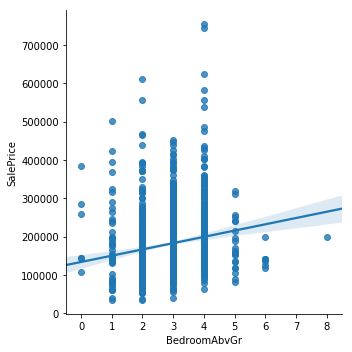

In [33]:
sns.lmplot('BedroomAbvGr', 'SalePrice', data=house)